In [ ]:
!pip install numpy
!pip install matplotlib

Done epoch : 1
Done epoch : 2
Done epoch : 3
Done epoch : 4
Done epoch : 5


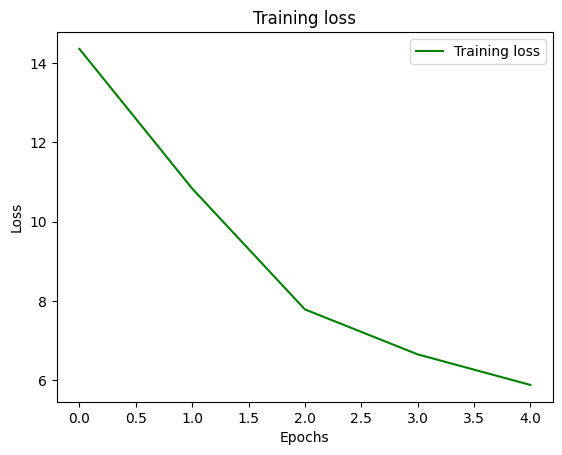

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import mnist
mnist.init()
m_x_train, m_t_train, m_x_test, m_t_test = mnist.load()

def n_sigmoid(x):
    return 1 / (1 + (np.exp(-x)))

def n_softmax(x):
    # stabilize by substracting the max
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def n_d_sigmoid(x):
    s = n_sigmoid(x)
    return s * (1 - s)

def lin(input, weight, bias):
    return np.dot(input, weight) + bias

def lin_grad(lin_input, output_grad, weights):
    dW = np.matmul(lin_input.reshape(lin_input.shape[0], 1), output_grad.reshape(1, output_grad.shape[0]))
    dx = (output_grad[None, :] * weights).sum(axis=1)
    db = output_grad.copy()
    return dW, dx, db

def n_cross_entropy(predictions, targets):
    # target is one hot
    return -np.sum(targets * np.log(predictions))

# minmax scaler
def n_normalize(v, ma, mi): 
    norm = (v - mi) / (ma - mi)
    return norm

ma = m_x_train.max()
mi = m_x_train.min()
m_x_train_normize = n_normalize(m_x_train, ma, mi)

def n_one_hot(arr):
    new_arr = np.zeros((arr.size, arr.max() + 1))
    new_arr[np.arange(arr.size), arr] = 1
    return new_arr
    
m_t_train_one_hot = n_one_hot(np.array(m_t_train))

# hyperparameters
lr = 1e-5
size_layer_1 = 300
size_layer_2 = 10
epoch = 5

num_of_input = 784
W = np.random.randn(num_of_input, size_layer_1) 
b = np.zeros(size_layer_1)

V = np.random.randn(size_layer_1, size_layer_2) 
c = np.zeros(size_layer_2)

len_train =  len(m_x_train_normize)
losses = []

# training loop
for e in range(epoch):
    a_dW = np.zeros((num_of_input, size_layer_1))
    a_dV = np.zeros((size_layer_1, size_layer_2))
    a_db = np.zeros(size_layer_1)
    a_dc = np.zeros(size_layer_2)
    
    loss = []
    
    for i in range(len_train):
        
        x = m_x_train_normize[i]
        t = m_t_train_one_hot[i]
        
        # forward
        k = lin(x, W, b)
        h = n_sigmoid(k)
        o = lin(h, V, c)
        y = n_softmax(o)
        
        l = n_cross_entropy(y, t)
        loss.append(l)
        
        # backward
        # dl_do = dl_dy * dy_do
        # dl_dy = deriv of cross entropy
        # dy_do = deriv of softmax
        do = y - t 
        dV, dh, dc = lin_grad(h, do, V)
        dk = dh * n_d_sigmoid(k)
        dW, dx, db = lin_grad(x, dk, W)
        
        # accumulate gradients
        a_dW += dW
        a_dV += dV
        a_db += db
        a_dc += dc
    
    # sgd - after each epoch
    W = W + -lr * a_dW
    b = b + -lr * a_db
    V = V + -lr * a_dV
    c = c + -lr * a_dc
    
    losses.append(np.mean(loss))
    
    print(f'Done epoch : {e+1}')

def plot_losses(loss_train):
    epochs = range(0,len(loss_train))
    plt.plot(epochs, loss_train, 'g', label='Training loss')
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
plot_losses(losses)